# New ts_gen

In [1]:
import torch
torch.cuda.empty_cache()

In [5]:
from utils.meta_eval import TSGenArgs, create_ds_dict, plot_ds
from experiments.meta_eval.me import experiment

args = TSGenArgs()
args.n_epochs = 1
args.test_interval = 1
args.gnn_depth = 2
args.n_layers = 2
# args.remove_existing_data = True

exp_log = experiment(args)

Starting training...
Starting training...
Starting training...
100%|██████████| 843/843 [00:51<00:00, 16.46it/s]
Epoch 1: Training Loss 0.17957343306618642
Epoch 1: Training Loss 0.17957343306618642
Epoch 1: Training Loss 0.17957343306618642
100%|██████████| 843/843 [00:50<00:00, 16.54it/s]
Epoch 2: Training Loss 0.16666459395657762
Epoch 2: Training Loss 0.16666459395657762
Epoch 2: Training Loss 0.16666459395657762
100%|██████████| 843/843 [00:53<00:00, 15.71it/s]
Epoch 3: Training Loss 0.17145675103397595
Epoch 3: Training Loss 0.17145675103397595
Epoch 3: Training Loss 0.17145675103397595
100%|██████████| 843/843 [00:53<00:00, 15.77it/s]
Epoch 4: Training Loss 0.17024095889058993
Epoch 4: Training Loss 0.17024095889058993
Epoch 4: Training Loss 0.17024095889058993
100%|██████████| 843/843 [00:53<00:00, 15.72it/s]
Epoch 5: Training Loss 0.1722205776710924
Epoch 5: Training Loss 0.1722205776710924
Epoch 5: Training Loss 0.1722205776710924
100%|██████████| 843/843 [00:52<00:00, 16.04i

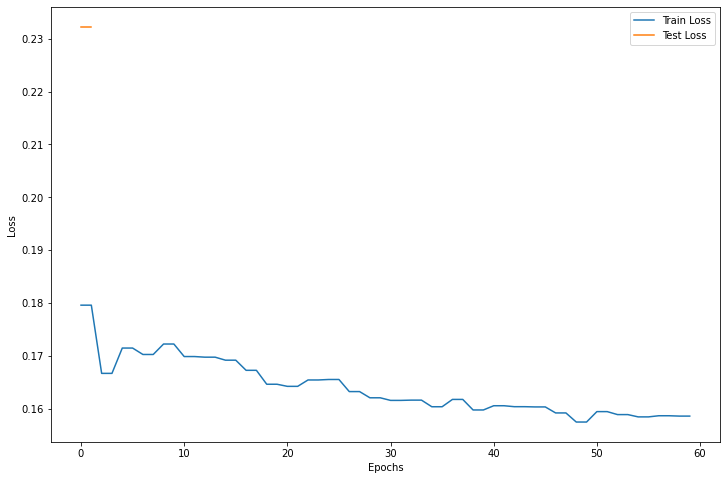

In [6]:
file_name = '11.npy'
exp_log.save_Ds(file_name, save_to_log_dir=True)
exp_log.save_Ws(file_name, save_to_log_dir=True)
exp_log.plot_loss(save_fig = True)

/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/anaconda/envs/3d-rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

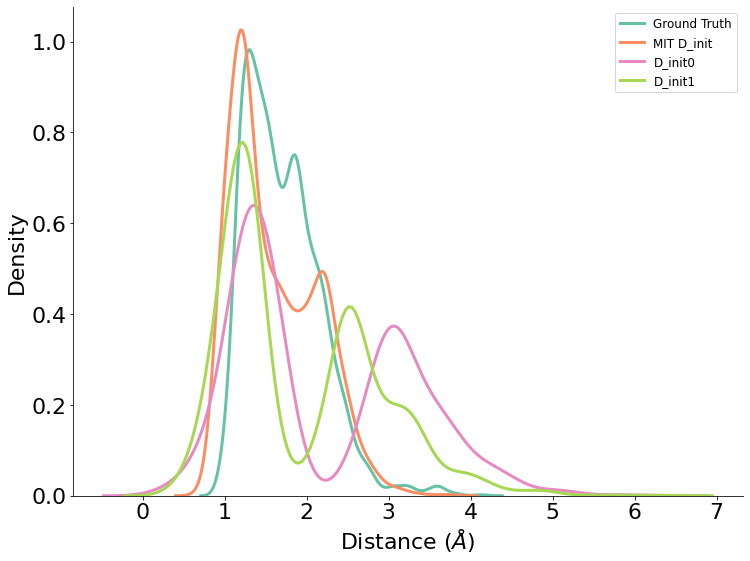

In [5]:
import os

# create ds_dict and plot d_inits
mols_folder = 'data/raw/'
d_folder = 'experiments/meta_eval/d_inits/'

d_plot_name = os.path.join(os.path.dirname(args.log_dir), 'dplot') # None won't save fig
# b/d/n=standard; h=32 1(e=20), 2(e=30)
# standard: 1(e=100,t=2500s), 3(e=10, t=400s), 4(e=30, t=1200s), 5(e=50, t=1900s), 6(e=100, t=3850s)
d_files = ['1.npy', '6.npy'] 
ds_not_to_print = ['lin_approx']
ds_dict = create_ds_dict(d_files, d_folder, mols_folder) # TODO: create default d_init class for these?
plot_ds(ds_dict, ds_not_to_print, d_plot_name)

In [36]:
# TODO: add function for this: take in i and print mine, MIT, GT

def print_one_d_init(i, my_d, mit_d):
    np.set_printoptions(precision = 3, threshold = 5, edgeitems = 5, suppress = True)
    num_atoms = test_ts[i].GetNumAtoms()
    print("Mine: \n", my_d[i][0:num_atoms, 0:num_atoms])
    print("MIT: \n", mit_d[i][0:num_atoms, 0:num_atoms])
    print("GT: \n", Chem.Get3DDistanceMatrix(test_ts[i]))



print(D_init.shape, D_init1.shape)
np.set_printoptions(precision = 3, threshold = 5, edgeitems = 5, suppress = True)
i = 10
num_atoms = test_ts[i].GetNumAtoms()
print("MIT: \n", D_init[i][0:num_atoms, 0:num_atoms])
print("Mine: \n", D_init1[i][0:num_atoms, 0:num_atoms])
print("GT: \n", Chem.Get3DDistanceMatrix(test_ts[i]))

(842, 21, 21) (842, 21, 21)
Mine: 
 [[ 0.01   1.927  6.569 10.64   6.283 ...  0.925  5.99  11.117  7.605
  17.858]
 [ 1.927  0.01   2.395  4.42   2.063 ...  3.684  2.518  5.115  5.006
   8.857]
 [ 6.569  2.395  0.01   2.264  4.064 ...  9.973  7.831  1.2    1.198
   5.041]
 [10.64   4.42   2.264  0.01   1.828 ... 15.898  6.923  4.686  4.685
   1.032]
 [ 6.283  2.063  4.064  1.828  0.01  ...  9.977  2.084  7.698  7.739
   4.341]
 ...
 [ 0.925  3.684  9.973 15.898  9.977 ...  0.01   7.137 13.724 11.842
  23.922]
 [ 5.99   2.518  7.831  6.923  2.084 ...  7.137  0.01  10.676 13.604
  10.21 ]
 [11.117  5.115  1.2    4.686  7.698 ... 13.724 10.676  0.01   3.248
   6.337]
 [ 7.605  5.006  1.198  4.685  7.739 ... 11.842 13.604  3.248  0.01
   8.529]
 [17.858  8.857  5.041  1.032  4.341 ... 23.922 10.21   6.337  8.529
   0.01 ]]
GT: 
 [[0.    1.385 2.561 3.26  2.505 ... 0.957 2.445 3.333 2.756 4.225]
 [1.385 0.    1.544 2.1   1.433 ... 1.917 1.584 2.259 2.235 2.974]
 [2.561 1.544 0.    1.501 2.0

## Ensemble

Average all produced $D_{inits}s$ then plot.

In [ ]:
from utils.meta_eval import ensemble_plot

d_files = ['1.npy', '6.npy'] 
ds_dict = create_ds_dict(d_files, d_folder, mols_folder)
ds_not_to_print = ['lin_approx']

ensemble_plot(ds_dict, ds_not_to_print)

ImportError: cannot import name 'ensemble_plot'